
# 1. Downloading Datasets and Visualizing

### 📥 Download Dataset
We use the [Vietnamese Online News Dataset](https://www.kaggle.com/datasets/haitranquangofficial/vietnamese-online-news-dataset) from Kaggle.  
On Kaggle Notebooks, the dataset is automatically available under `/kaggle/input/...`. 

In [1]:
# Install dependencies as needed:
# kagglehub: used to download datasets directly from Kaggle 
!pip install kagglehub[pandas-datasets]
!pip install regex
!pip install pyvi

In [2]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "news_dataset.json"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "haitranquangofficial/vietnamese-online-news-dataset",
  file_path,
)

print("First 5 records:", df.head(10))

C:\Users\PC\AppData\Local\Temp\ipykernel_20128\652278202.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:        id             author  \
0  218270                      
1  218269      (Nguồn: Sina)   
2  218268          Hồ Sỹ Anh   
3  218267           Ngọc Ánh   
4  218266  HẢI YẾN - MINH LÝ   
5  218265                      
6  218264                      
7  218263   Hoàng Yến/VOV.VN   
8  218262                T.G   
9  218261           Đỗ Trung   

                                             content  picture_count  \
0  Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã c...              3   
1  Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...              1   
2  Kết quả thi tốt nghiệp THPT năm 2022 cho thấy ...              3   
3  Thống đốc Kentucky Andy Beshear hôm 31/7 cho h...              1   
4  Vụ tai nạn giao thông liên hoàn trên phố đi bộ...             12   
5  Chia sẻ trên Twitter, thị trưởng Hanover Belit...              2   
6  "Em vỡ òa trong hạnh phúc khi được xướng tên ở...              8   
7                                                             

In [3]:
# Check info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184539 entries, 0 to 184538
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             184539 non-null  int64         
 1   author         184539 non-null  object        
 2   content        184539 non-null  object        
 3   picture_count  184539 non-null  int64         
 4   processed      184539 non-null  int64         
 5   source         184534 non-null  object        
 6   title          184539 non-null  object        
 7   topic          184539 non-null  object        
 8   url            184539 non-null  object        
 9   crawled_at     184125 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 14.1+ MB


In [4]:
# Check missing values in each column
print(df.isnull().sum())

id                 0
author             0
content            0
picture_count      0
processed          0
source             5
title              0
topic              0
url                0
crawled_at       414
dtype: int64


In [5]:
text_cols = [c for c in ["author", "content", "picture_count", "processed", "source", "topic", "url"] if c in df.columns]
df["text"] = df[text_cols].astype(str).agg(" ".join, axis=1)

df.head()

,id,author,content,picture_count,processed,source,title,topic,url,crawled_at,text
0,218270,,"Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã c...",3,0,docbao.vn,"Tên cướp tiệm vàng tại Huế là đại uý công an, ...",Pháp luật,https://docbao.vn/phap-luat/ten-cuop-tiem-vang...,2022-08-01 09:09:22.817308,"Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã ..."
1,218269,(Nguồn: Sina),"Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...",1,0,vtc.vn,"Bỏ qua mạng 5G, Nga tiến thẳng từ 4G lên 6G",Sống kết nối,https://vtc.vn/bo-qua-mang-5g-nga-tien-thang-t...,2022-08-01 09:09:21.181469,"(Nguồn: Sina) Gần đây, Thứ trưởng Bộ Phát triể..."
2,218268,Hồ Sỹ Anh,Kết quả thi tốt nghiệp THPT năm 2022 cho thấy ...,3,0,thanhnien.vn,Địa phương nào đứng đầu cả nước tổng điểm 3 mô...,Giáo dục,https://thanhnien.vn/dia-phuong-nao-dung-dau-c...,2022-08-01 09:09:15.311901,Hồ Sỹ Anh Kết quả thi tốt nghiệp THPT năm 2022...
3,218267,Ngọc Ánh,Thống đốc Kentucky Andy Beshear hôm 31/7 cho h...,1,0,vnexpress,Người chết trong mưa lũ 'nghìn năm có một' ở M...,Thế giới,https://vnexpress.net/nguoi-chet-trong-mua-lu-...,2022-08-01 09:09:02.211498,Ngọc Ánh Thống đốc Kentucky Andy Beshear hôm 3...
4,218266,HẢI YẾN - MINH LÝ,Vụ tai nạn giao thông liên hoàn trên phố đi bộ...,12,0,soha,"Hải Phòng: Hình ảnh xe ""điên"" gây tai nạn liên...",Thời sự - Xã hội,https://soha.vn/hai-phong-hinh-anh-xe-dien-gay...,2022-08-01 09:09:01.601170,HẢI YẾN - MINH LÝ Vụ tai nạn giao thông liên h...


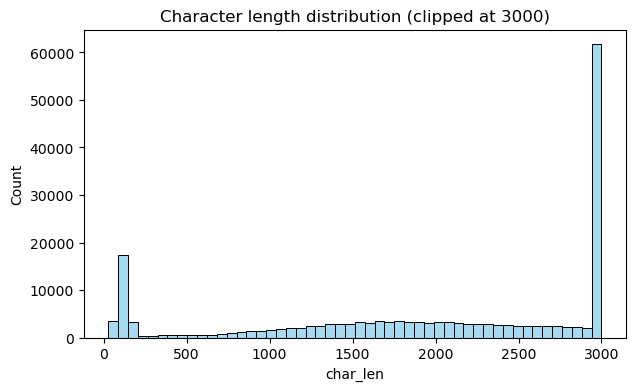

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

df["char_len"] = df["text"].astype(str).str.len()

plt.figure(figsize=(7,4))
sns.histplot(df["char_len"].clip(upper=3000), bins=50, color="skyblue")
plt.title("Character length distribution (clipped at 3000)")
plt.show()

# 2. Text Preprocessing

**Goal:** Convert raw Vietnamese news text into a clean and consistent form, ready for feature extraction (Bag-of-Words, TF-IDF, or embeddings) and model training.

**Main steps in the pipeline:**
1. Remove HTML tags: Strip `<script>`, `<style>`, and markup; keep only visible text.
2. Remove HTML entities: Remove `&amp`;, `&nbsp;`, `&#160;`
3. Convert encoding errors (Windows-1252 → UTF-8)  
4. Tokenization (Vietnamese word segmentation): Use a VN segmenter (e.g., `VnCoreNLP` / `underthesea` / `PyVi`) to split words.
5. Case normalization: Lowercase while preserving proper nouns and acronyms
6. Remove common tokens (emails, URLs, phones, dates, numbers, mentions): Regex out noise like `email@x`, `http(s)://…`, `@name`, phone/date patterns.
7. Remove emojis / emoticons: Drop Unicode emoji and ASCII emoticons (e.g., :), :D.  
8. Remove unwanted characters (non-Latin, _, extra spaces)
9. Normalize Vietnamese diacritics  
10. Strip whitespace  

In [7]:
import re, unicodedata
import regex
from pyvi import ViTokenizer, ViPosTagger

# Regex patterns
RE_EMAIL = re.compile(r"([\w0-9_\.-]+)(@)([\d\w\.-]+)(\.)([\w\.]{2,6})")
RE_URL = re.compile(r"https?:\/\/(?!.*:\/\/)\S+")
RE_PHONE = re.compile(r"(09|01[2|6|8|9])+([0-9]{8})\b")
RE_MENTION = re.compile(r"@.+?:")
RE_NUMBER = re.compile(r"\d+\.?\d*")
RE_DATETIME = '\d{1,2}\s?[/-]\s?\d{1,2}\s?[/-]\s?\d{4}'
RE_HTML_TAG = re.compile(r'<[^>]+>')
RE_CLEAR_1 = regex.compile(r"[^_<>\s\p{Latin}]")  # requires 'regex' library
RE_CLEAR_2 = re.compile(r"__+")
RE_CLEAR_3 = re.compile(r"\s+")

KEEP_DIACRITICS = True # Keep Vietnamese diacritics when lower-casing

<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\PC\AppData\Local\Temp\ipykernel_20128\1624471505.py:11: SyntaxWarning: invalid escape sequence '\d'
  RE_DATETIME = '\d{1,2}\s?[/-]\s?\d{1,2}\s?[/-]\s?\d{4}'


In [8]:
def replace_common_token(txt):
  txt = re.sub(RE_EMAIL, ' ', txt)
  txt = re.sub(RE_URL, ' ', txt)
  txt = re.sub(RE_MENTION, ' ', txt)
  txt = re.sub(RE_DATETIME, ' ', txt)
  txt = re.sub(RE_NUMBER, ' ', txt)
  return txt

In [9]:
def remove_emoji(txt):
    txt = re.sub(r':v', '', txt)
    txt = re.sub(r':D', '', txt)
    txt = re.sub(r':3', '', txt)
    txt = re.sub(r':\(', '', txt)
    txt = re.sub(r':\)', '', txt)
    txt = re.sub(r'=\)*', '', txt)
    return txt

In [10]:
def remove_html_tag(txt):
    return re.sub(RE_HTML_TAG, ' ', txt)

In [11]:
def loaddicchar():
    dic = {}
    char1252 = (
        'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|'
        'è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|'
        'ì|í|ỉ|ĩ|ị|'
        'ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|'
        'ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|'
        'ỳ|ý|ỷ|ỹ|ỵ|'
        'À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|'
        'È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|'
        'Ì|Í|Ỉ|Ĩ|Ị|'
        'Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|'
        'Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|'
        'Ỳ|Ý|Ỷ|Ỹ|Ỵ'
    ).split('|')

    charutf8 = (
        'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|'
        'è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|'
        'ì|í|ỉ|ĩ|ị|'
        'ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|'
        'ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|'
        'ỳ|ý|ỷ|ỹ|ỵ|'
        'À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|'
        'È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|'
        'Ì|Í|Ỉ|Ĩ|Ị|'
        'Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|'
        'Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|'
        'Ỳ|Ý|Ỷ|Ỹ|Ỵ'
    ).split('|')

    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

dicchar = loaddicchar()

def convertwindown1525toutf8(txt):
    """
    Convert Vietnamese text from Windows-1252/VNI encoding errors
    to proper UTF-8 Unicode.
    """
    return re.sub(
        '|'.join(dicchar.keys()),  # regex khớp toàn bộ các ký tự lỗi
        lambda x: dicchar[x.group()],
        txt
    )

In [12]:
bang_nguyen_am = [['a', 'à', 'á', 'ả', 'ã', 'ạ', 'a'],
                  ['ă', 'ằ', 'ắ', 'ẳ', 'ẵ', 'ặ', 'aw'],
                  ['â', 'ầ', 'ấ', 'ẩ', 'ẫ', 'ậ', 'aa'],
                  ['e', 'è', 'é', 'ẻ', 'ẽ', 'ẹ', 'e'],
                  ['ê', 'ề', 'ế', 'ể', 'ễ', 'ệ', 'ee'],
                  ['i', 'ì', 'í', 'ỉ', 'ĩ', 'ị', 'i'],
                  ['o', 'ò', 'ó', 'ỏ', 'õ', 'ọ', 'o'],
                  ['ô', 'ồ', 'ố', 'ổ', 'ỗ', 'ộ', 'oo'],
                  ['ơ', 'ờ', 'ớ', 'ở', 'ỡ', 'ợ', 'ow'],
                  ['u', 'ù', 'ú', 'ủ', 'ũ', 'ụ', 'u'],
                  ['ư', 'ừ', 'ứ', 'ử', 'ữ', 'ự', 'uw'],
                  ['y', 'ỳ', 'ý', 'ỷ', 'ỹ', 'ỵ', 'y']]
bang_ky_tu_dau = ['', 'f', 's', 'r', 'x', 'j']

nguyen_am_to_ids = {}

for i in range(len(bang_nguyen_am)):
    for j in range(len(bang_nguyen_am[i]) - 1):
        nguyen_am_to_ids[bang_nguyen_am[i][j]] = (i, j)

In [13]:
def is_valid_vietnam_word(word):
    chars = list(word)
    nguyen_am_index = -1
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x != -1:
            if nguyen_am_index == -1:
                nguyen_am_index = index
            else:
                if index - nguyen_am_index != 1:
                    return False
                nguyen_am_index = index
    return True

In [14]:
def chuan_hoa_dau_tu_tieng_viet(word):
    """
    Normalize tone marks in a single Vietnamese word.
    Ensures tone marks are placed on the correct vowel
    according to Vietnamese orthography.
    Example: 'hoà' -> 'hoà', 'thỏai' -> 'thoải', 'úy' -> 'úy'
    """
    if not is_valid_vietnam_word(word):
        return word

    chars = list(word)
    dau_cau = 0              # tone mark type (sắc, huyền, hỏi, ngã, nặng)
    nguyen_am_index = []     # indexes of vowels in the word
    qu_or_gi = False         # special case flag for "qu" and "gi"

    # Scan each character
    for index, char in enumerate(chars):
        x, y = nguyen_am_to_ids.get(char, (-1, -1))
        if x == -1:
            continue

        # Special case "qu": treat 'u' after 'q' as a consonant
        if x == 9 and index > 0 and chars[index - 1] == 'q':
            chars[index] = 'u'
            qu_or_gi = True

        # Special case "gi": treat 'i' after 'g' as a consonant
        elif x == 5 and index > 0 and chars[index - 1] == 'g':
            chars[index] = 'i'
            qu_or_gi = True

        # If this vowel has a tone mark → record it
        if y != 0:
            dau_cau = y
            chars[index] = bang_nguyen_am[x][0]  # reset to base vowel

        # Record vowel index unless it's part of "qu"/"gi"
        if not qu_or_gi or index != 1:
            nguyen_am_index.append(index)

    # Case: no valid vowels
    if len(nguyen_am_index) < 2:
        if qu_or_gi:
            if len(chars) == 2:
                # "gi", "qu" cases with 2 letters
                x, y = nguyen_am_to_ids.get(chars[1])
                chars[1] = bang_nguyen_am[x][dau_cau]
            else:
                # longer word with "gi"/"qu"
                x, y = nguyen_am_to_ids.get(chars[2], (-1, -1))
                if x != -1:
                    chars[2] = bang_nguyen_am[x][dau_cau]
                else:
                    # fallback: put tone on i or u
                    chars[1] = bang_nguyen_am[5][dau_cau] if chars[1] == 'i' else bang_nguyen_am[9][dau_cau]
            return ''.join(chars)
        return word

    # Case: if the word contains ê or ơ → always put the tone there
    for index in nguyen_am_index:
        x, y = nguyen_am_to_ids[chars[index]]
        if x == 4 or x == 8:  # ê, ơ
            chars[index] = bang_nguyen_am[x][dau_cau]
            return ''.join(chars)

    # Case: word has 2 vowels
    if len(nguyen_am_index) == 2:
        if nguyen_am_index[-1] == len(chars) - 1:
            # If last vowel is at the end → tone goes to the first vowel
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[0]]]
            chars[nguyen_am_index[0]] = bang_nguyen_am[x][dau_cau]
        else:
            # Otherwise → tone goes to the second vowel
            x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
            chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]

    # Case: word has 3 vowels (e.g., "khuyên")
    else:
        # Place tone on the middle vowel
        x, y = nguyen_am_to_ids[chars[nguyen_am_index[1]]]
        chars[nguyen_am_index[1]] = bang_nguyen_am[x][dau_cau]

    return ''.join(chars)

In [15]:
def chuan_hoa_dau_cau_tieng_viet(sentence):
    """
        Chuyển câu tiếng việt về chuẩn gõ dấu kiểu cũ.
        :param sentence:
        :return:
        """
    sentence = sentence.lower()
    words = sentence.split()
    for index, word in enumerate(words):
        words[index] = chuan_hoa_dau_tu_tieng_viet(word)
    return ' '.join(words)

In [16]:
def merge_proper_nouns(tokens, tags):
    """
    Merge consecutive Np tokens into a single proper noun.
    Example: ['Việt','Nam'] → ['Việt_Nam']
    """
    merged_tokens = []
    merged_tags = []
    temp = []
    for tok, tag in zip(tokens, tags):
        if tag == "Np":
            temp.append(tok)
        else:
            if temp:
                merged_tokens.append("_".join(temp))
                merged_tags.append("Np")
                temp = []
            merged_tokens.append(tok)
            merged_tags.append(tag)
    if temp:
        merged_tokens.append("_".join(temp))
        merged_tags.append("Np")
    return merged_tokens, merged_tags


def smart_lowercase_pyvi(txt: str) -> str:
    # POS tagging with PyVi
    tokens, pos_tags = ViPosTagger.postagging(txt)
    
    # Merge proper nouns
    tokens, pos_tags = merge_proper_nouns(tokens, pos_tags)

    new_tokens = []
    for tok, tag in zip(tokens, pos_tags):
        if tag == "Np":   # proper noun → keep original (capitalize first letter if needed)
            new_tokens.append(tok)
        else:             # normal word → lowercase
            new_tokens.append(tok.lower())

    return " ".join(new_tokens)

In [17]:
def preprocess(txt, tokenize=True):
    # 1. Remove HTML tags
    txt = remove_html_tag(txt)

    # 2. Remove HTML entities like &nbsp; &amp; ...
    txt = re.sub('&.{3,4};', ' ', txt)

    # 3. Convert Windows-1252/VNI encoding errors to UTF-8
    txt = convertwindown1525toutf8(txt)

    # 4. Tokenization (Vietnamese word segmentation)
    if tokenize:
        txt = ViTokenizer.tokenize(txt)

    # 5. Smart lowercase (POS tagging)
    txt = smart_lowercase_pyvi(txt) 
    
    # 6. Remove common tokens (emails, URLs, mentions, dates, numbers, phones)
    txt = replace_common_token(txt)

    # 7. Remove emojis and emoticons
    txt = remove_emoji(txt)

    # 8. Remove unwanted characters
    txt = RE_CLEAR_1.sub(" ", txt)  # non-Latin chars
    txt = RE_CLEAR_2.sub(" ", txt)  # collapse multiple underscores
    txt = RE_CLEAR_3.sub(" ", txt)  # collapse multiple spaces

    # 9. Normalize Vietnamese diacritics
    txt = chuan_hoa_dau_tu_tieng_viet(txt)

    # 10. Strip leading/trailing whitespace
    return txt.strip()

In [18]:
from tqdm import tqdm
tqdm.pandas()

df['preprocessed_content'] = df['content'].progress_apply(preprocess)
df['preprocessed_title'] = df['title'].progress_apply(preprocess)
df['preprocessed_topic'] = df['topic'].progress_apply(preprocess)

100%|██████████| 184539/184539 [00:08<00:00, 22483.66it/s]


# 3. Topic Classification

### 🎯 Objective
- Train and evaluate machine-learning models to classify Vietnamese news articles by topic.  
- **Input**: preprocessed `title + content` (from Step 2).  
- **Output**: `topic` (e.g., *pháp luật, đời sống, thể thao, ...*).  

## 3.1 Data Preparation

### 3.1.1 Combining text

- Concatenate `preprocessed_title` and `preprocessed_content` into a single field → `raw_text`.  


In [19]:
# Create a new column 'raw_text' by concatenating the preprocessed title and content
df['raw_text'] = df['preprocessed_title'] + " " + df['preprocessed_content']

### 3.1.2 Label normalization:  
  1. Convert all values in `preprocessed_topic` to lowercase.  
  2. Apply a normalization function (`norm`):  
     - Strip leading/trailing spaces.  
     - Convert to lowercase.  
     - Replace whitespaces with underscores `_`.  
     - Collapse multiple underscores into one.  
  3. Map normalized topics to broader macro categories using the predefined dictionary `raw_to_macro_vi`.  
  4. Apply a minimum sample threshold (≥200); infrequent topics are reassigned to the fallback label `khác`.  

In [20]:
def norm(s: str) -> str:
    s = s.strip().lower()              # trim spaces & convert to lowercase
    s = re.sub(r"\s+", "_", s)         # replace spaces with "_"
    s = re.sub(r"_+", "_", s)          # collapse multiple "_" into one
    return s

In [21]:
raw_to_macro_vi = {
    # Thế giới / Quốc tế
    "thế_giới":"thế_giới","quốc_tế":"thế_giới","thế_giới_đó_đây":"thế_giới","thời_sự_quốc_tế":"thế_giới",
    "quân_sự":"thế_giới", "ngoại_giao":"thế_giới",

    # Thời sự / Xã hội trong nước
    "thời_sự":"trong_nước","trong_nước":"trong_nước","xã_hội":"trong_nước",
    "thời_sự_xã_hội":"trong_nước","chính_trị_xã_hội":"trong_nước","chuyển_động_sài_gòn":"trong_nước",
    "tin_tức":"trong_nước","tin_tức_trong_ngày":"trong_nước","tin_nhanh_h":"trong_nước","cần_biết":"trong_nước",

    # Chính trị / Pháp luật
    "chính_trị":"chính_trị","pháp_luật":"pháp_luật",

    # Kinh doanh / Kinh tế
    "kinh_doanh":"kinh_doanh","kinh_tế":"kinh_doanh","tài_chính_kinh_doanh":"kinh_doanh",
    "thị_trường_tiêu_dùng":"kinh_doanh","doanh_nghiệp":"kinh_doanh",

    # Thể thao (gộp giải đấu)
    "thể_thao":"thể_thao","bóng_đá":"thể_thao","bóng_đá_việt_nam":"thể_thao",
    "v_league":"thể_thao","la_liga":"thể_thao","ngoại_hạng_anh":"thể_thao",
    "chuyển_nhượng":"thể_thao","soi_kèo":"thể_thao",

    # Giải trí / Showbiz / Truyền hình / Video
    "giải_trí":"giải_trí","văn_hóa_giải_trí":"giải_trí","sao_việt":"giải_trí","sao":"giải_trí",
    "star":"giải_trí","star_style":"giải_trí","đời_sống_showbiz":"giải_trí",
    "tv_show":"giải_trí","truyền_hình":"giải_trí","clip_eva":"giải_trí","series_truyền_hình":"giải_trí",
    "video":"giải_trí",

    # Công nghệ / Số hoá
    "công_nghệ":"công_nghệ","công_nghệ_thông_tin":"công_nghệ","công_nghệ_game":"công_nghệ",
    "số_hóa":"công_nghệ","sức_mạnh_số":"công_nghệ","thời_trang_hi_tech":"công_nghệ",

    # Khoa học
    "khoa_học":"khoa_học","khám_phá":"khoa_học",

    # Sức khoẻ
    "sức_khỏe":"sức_khỏe","sống_khỏe":"sức_khỏe","sức_khỏe_đời_sống":"sức_khỏe",

    # Đời sống / Giới trẻ / Gia đình / Tâm sự
    "đời_sống":"đời_sống","sống":"đời_sống","gia_đình":"đời_sống",
    "gia_đình_hôn_nhân":"đời_sống","tâm_sự":"đời_sống","giới_trẻ":"đời_sống",
    "bạn_trẻ_cuộc_sống":"đời_sống","nhịp_sống_trẻ":"đời_sống","cư_dân_mạng":"đời_sống",

    # Giáo dục
    "giáo_dục":"giáo_dục","giáo_dục_hướng_nghiệp":"giáo_dục","học_đường":"giáo_dục",

    # Xe
    "xe":"xe","ô_tô":"xe","ô_tô_xe_máy":"xe",

    # Bất động sản
    "bất_động_sản":"bất_động_sản","địa_ốc":"bất_động_sản",

    # Văn hoá / Xuất bản / Văn nghệ
    "văn_hóa":"văn_hóa","văn_nghệ":"văn_hóa","xuất_bản":"văn_hóa",

    # Du lịch
    "du_lịch":"du_lịch",

    # Ý kiến / Bạn đọc
    "ý_kiến":"ý_kiến","bạn_đọc":"ý_kiến",

    # Thời trang / Làm đẹp / Ẩm thực
    "thời_trang":"thời_trang","làm_đẹp":"làm_đẹp","ẩm_thực":"ẩm_thực",

    # Lao động – Công đoàn / An sinh / Nông nghiệp
    "công_đoàn":"lao_động","an_sinh":"an_sinh","nhà_nông":"nông_nghiệp",

    # Rỗng/không xác định
    "none":"khác",
}


In [22]:
# Convert all values in the 'preprocessed_topic' column to lowercase
df['preprocessed_topic'] = df['preprocessed_topic'].str.lower()

# Normalize and map topics to broader categories (macro labels)
raw = df['preprocessed_topic'].astype(str).map(norm)
df['macro_vi'] = raw.map(lambda s: raw_to_macro_vi.get(s, 'khác'))

# Set the minimum threshold for the number of samples per class
min_count = 200

# Count samples per class and get classes that meet the threshold
vc = df['macro_vi'].value_counts()
valid_topics = set(vc[vc >= min_count].index)  # set of valid classes

# Filter the DataFrame to keep only rows with valid macro labels
df_filtered = df[df['macro_vi'].isin(valid_topics)]

In [23]:
df_filtered.head()

,id,author,content,picture_count,processed,source,title,topic,url,crawled_at,text,char_len,preprocessed_content,preprocessed_title,preprocessed_topic,raw_text,macro_vi
0,218270,,"Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã c...",3,0,docbao.vn,"Tên cướp tiệm vàng tại Huế là đại uý công an, ...",Pháp luật,https://docbao.vn/phap-luat/ten-cuop-tiem-vang...,2022-08-01 09:09:22.817308,"Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã ...",2896,chiều công_an tỉnh Thừa_Thiên Huế đã có thông_...,tên cướp tiệm vàng tại Huế là đại_uý công_an c...,pháp_luật,tên cướp tiệm vàng tại Huế là đại_uý công_an c...,pháp_luật
1,218269,(Nguồn: Sina),"Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...",1,0,vtc.vn,"Bỏ qua mạng 5G, Nga tiến thẳng từ 4G lên 6G",Sống kết nối,https://vtc.vn/bo-qua-mang-5g-nga-tien-thang-t...,2022-08-01 09:09:21.181469,"(Nguồn: Sina) Gần đây, Thứ trưởng Bộ Phát triể...",1553,gần đây thứ_trưởng Bộ phát_triển kỹ_thuật_số t...,bỏ_qua mạng G Nga tiến thẳng từ g lên G,sống kết_nối,bỏ_qua mạng G Nga tiến thẳng từ g lên G gần đâ...,khác
2,218268,Hồ Sỹ Anh,Kết quả thi tốt nghiệp THPT năm 2022 cho thấy ...,3,0,thanhnien.vn,Địa phương nào đứng đầu cả nước tổng điểm 3 mô...,Giáo dục,https://thanhnien.vn/dia-phuong-nao-dung-dau-c...,2022-08-01 09:09:15.311901,Hồ Sỹ Anh Kết quả thi tốt nghiệp THPT năm 2022...,5805,kết_quả thi tốt_nghiệp thpt năm cho thấy điểm ...,địa_phương nào đứng đầu cả nước tổng_điểm môn ...,giáo_dục,địa_phương nào đứng đầu cả nước tổng_điểm môn ...,giáo_dục
3,218267,Ngọc Ánh,Thống đốc Kentucky Andy Beshear hôm 31/7 cho h...,1,0,vnexpress,Người chết trong mưa lũ 'nghìn năm có một' ở M...,Thế giới,https://vnexpress.net/nguoi-chet-trong-mua-lu-...,2022-08-01 09:09:02.211498,Ngọc Ánh Thống đốc Kentucky Andy Beshear hôm 3...,1582,thống_đốc Kentucky_Andy_Beshear hôm cho hay sa...,người chết trong mưa_lũ nghìn năm có một ở Mỹ ...,thế_giới,người chết trong mưa_lũ nghìn năm có một ở Mỹ ...,thế_giới
4,218266,HẢI YẾN - MINH LÝ,Vụ tai nạn giao thông liên hoàn trên phố đi bộ...,12,0,soha,"Hải Phòng: Hình ảnh xe ""điên"" gây tai nạn liên...",Thời sự - Xã hội,https://soha.vn/hai-phong-hinh-anh-xe-dien-gay...,2022-08-01 09:09:01.601170,HẢI YẾN - MINH LÝ Vụ tai nạn giao thông liên h...,1272,vụ tai_nạn giao_thông liên_hoàn trên phố đi bộ...,Hải_Phòng hình_ảnh xe điên gây tai_nạn liên_ho...,thời_sự xã_hội,Hải_Phòng hình_ảnh xe điên gây tai_nạn liên_ho...,trong_nước


### 3.1.3 Features/Labels:  
  - `X` = `raw_text`  
  - `y` = `macro_vi` (string labels, including `khác`).  

In [24]:
# Define features and labels after filtering
X = df_filtered['raw_text']            # features (original or preprocessed text)
y = df_filtered['macro_vi']  # filtered labels

# Check results
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Label distribution:")
print(y.value_counts())

Shape of X: (184539,)
Shape of y: (184539,)
Label distribution:
macro_vi
khác            60043
trong_nước      23436
thế_giới        15461
thể_thao        14161
giải_trí        12607
kinh_doanh      12297
đời_sống         9216
pháp_luật        8182
sức_khỏe         5871
giáo_dục         4644
công_nghệ        3509
xe               3036
văn_hóa          2671
du_lịch          1597
chính_trị        1532
ý_kiến           1309
khoa_học         1219
bất_động_sản     1109
lao_động          730
thời_trang        606
nông_nghiệp       562
làm_đẹp           264
an_sinh           256
ẩm_thực           221
Name: count, dtype: int64


### 3.1.4 Encode labels:  
  - Use `LabelEncoder` to convert string labels → integer IDs.  

In [25]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder: this will convert string labels into numeric IDs
le = LabelEncoder()

# Fit the encoder on labels 'y' and transform them into integer-encoded labels
y_encoded = le.fit_transform(y)

In [26]:
for idx, label in enumerate(le.classes_):
    print(idx, "→", label)

0 → an_sinh
1 → bất_động_sản
2 → chính_trị
3 → công_nghệ
4 → du_lịch
5 → giáo_dục
6 → giải_trí
7 → khoa_học
8 → khác
9 → kinh_doanh
10 → lao_động
11 → làm_đẹp
12 → nông_nghiệp
13 → pháp_luật
14 → sức_khỏe
15 → thế_giới
16 → thể_thao
17 → thời_trang
18 → trong_nước
19 → văn_hóa
20 → xe
21 → ý_kiến
22 → đời_sống
23 → ẩm_thực


### 3.1.5 Compute Class Weights

To handle **imbalanced data**, we compute class weights.  
- `class_weight='balanced'`: automatically balances weights inversely proportional to class frequencies.  
- `classes=np.unique(y_encoded)`: unique class labels.  
- `y=y_encoded`: the encoded target labels used to calculate weights.  

### 3.1.6 Stopwords

- Download the Vietnamese stopword list directly from GitHub using `wget`.  
- Load the file into Python and store as a list for use in `CountVectorizer` or `TfidfVectorizer`.  
- This helps filter out common, non-informative words (e.g., “và”, “của”, “là”).  

In [27]:
!wget -O stopwords.txt https://raw.githubusercontent.com/ltkk/vietnamese-stopwords/master/stopwords.txt

# đọc file vào Python
with open("stopwords.txt", encoding="utf-8") as f:
    stopwords = [line.strip() for line in f if line.strip()]
print(stopwords[:20])

['cho', 'chú_thích', 'các', 'còn', 'có', 'cũng', 'của', 'dân_số', 'hai', 'hoa', 'họ', 'introduction', 'khi', 'khoa_học', 'không', 'liên_kết', 'loài', 'là', 'làm', 'miêu_tả']


'wget' is not recognized as an internal or external command,
operable program or batch file.


## 3.3 Model Training & Evaluation

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [29]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights to handle imbalanced dataset
# - class_weight='balanced': automatically balances weights inversely proportional to class frequencies
# - classes=np.unique(y_encoded): list of unique class labels
# - y=y_encoded: the target labels used to calculate weights
class_weights_train = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_encoded
)

In [30]:
sample_weights = np.array([class_weights_train[label] for label in y_train])
sample_weights

array([ 0.12806031,  0.12806031,  0.83432346, ..., 10.53304795,
        0.32809033,  2.19125819])

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Vectorizer
vectorizer = CountVectorizer(stop_words=stopwords, ngram_range=(1, 3))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# NB + sample_weight
nb = MultinomialNB()
nb.fit(X_train_vec, y_train, sample_weight=sample_weights)

# Evaluate
y_pred = nb.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

print(f"MultinomialNB with Bag of Words accuracy: {accuracy:.3f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

MultinomialNB with Bag of Words accuracy: 0.491
Classification Report:
               precision    recall  f1-score   support

           0       0.10      0.39      0.16        51
           1       0.22      0.84      0.34       222
           2       0.16      0.92      0.27       306
           3       0.56      0.75      0.64       702
           4       0.28      0.74      0.40       319
           5       0.53      0.84      0.65       929
           6       0.59      0.62      0.60      2522
           7       0.30      0.60      0.40       244
           8       0.94      0.08      0.15     12009
           9       0.51      0.67      0.58      2460
          10       0.24      0.77      0.36       146
          11       0.16      0.79      0.27        53
          12       0.14      0.66      0.23       112
          13       0.52      0.89      0.65      1637
          14       0.49      0.89      0.63      1174
          15       0.72      0.78      0.75      3092
         

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Vectorizer
vectorizer = TfidfVectorizer(stop_words=stopwords, ngram_range=(1, 3))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 2: Naive Bayes + sample_weight
nb = MultinomialNB(fit_prior=True)
nb.fit(X_train_vec, y_train, sample_weight=sample_weights)

# Step 3: Evaluate
y_pred = nb.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)

print(f"MultinomialNB with TF-IDF accuracy: {accuracy:.3f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

MultinomialNB with TF-IDF accuracy: 0.465
Classification Report:
               precision    recall  f1-score   support

           0       0.06      0.59      0.11        51
           1       0.16      0.94      0.28       222
           2       0.14      0.93      0.24       306
           3       0.55      0.80      0.65       702
           4       0.25      0.77      0.37       319
           5       0.52      0.86      0.65       929
           6       0.59      0.57      0.58      2522
           7       0.29      0.68      0.41       244
           8       0.95      0.09      0.16     12009
           9       0.55      0.58      0.57      2460
          10       0.21      0.82      0.33       146
          11       0.10      1.00      0.19        53
          12       0.11      0.74      0.19       112
          13       0.47      0.91      0.62      1637
          14       0.47      0.84      0.60      1174
          15       0.72      0.75      0.74      3092
          16   

In [33]:
class_weight_dict = dict(zip(np.unique(y_encoded), class_weights_train))

In [35]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("Vectorizer_1_3gram", TfidfVectorizer(
        stop_words=stopwords,
        ngram_range=(1, 3),
        max_features=150_000,
        min_df=3,
        sublinear_tf=True
    )),
    ("Linear SVM", LinearSVC(class_weight=class_weight_dict))
])

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"LinearSVC with TF-IDF accuracy: {accuracy:.3f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


LinearSVC with TF-IDF accuracy: 0.633
Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.29      0.25        51
           1       0.36      0.68      0.47       222
           2       0.32      0.66      0.44       306
           3       0.61      0.83      0.70       702
           4       0.38      0.65      0.48       319
           5       0.57      0.85      0.68       929
           6       0.63      0.74      0.68      2522
           7       0.42      0.61      0.50       244
           8       0.80      0.41      0.54     12009
           9       0.60      0.72      0.65      2460
          10       0.37      0.70      0.48       146
          11       0.38      0.49      0.43        53
          12       0.36      0.55      0.44       112
          13       0.59      0.85      0.70      1637
          14       0.61      0.86      0.71      1174
          15       0.72      0.86      0.78      3092
          16       

In [37]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

model = Pipeline([
    ("Vectorizer_1_3gram", CountVectorizer(
        stop_words=stopwords,
        ngram_range=(1, 3),
    )),
    ("Linear SVM", LinearSVC(class_weight=class_weight_dict))
])

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"LinearSVC with BOW accuracy: {accuracy:.3f}")
print("Classification Report:\n", classification_report(y_test, y_pred))


c:\Users\PC\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC with TF-IDF accuracy: 0.587
Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.14      0.16        51
           1       0.43      0.42      0.42       222
           2       0.35      0.35      0.35       306
           3       0.63      0.59      0.61       702
           4       0.42      0.38      0.40       319
           5       0.64      0.60      0.62       929
           6       0.59      0.55      0.57      2522
           7       0.41      0.35      0.38       244
           8       0.55      0.61      0.57     12009
           9       0.60      0.58      0.59      2460
          10       0.52      0.42      0.46       146
          11       0.16      0.09      0.12        53
          12       0.40      0.23      0.29       112
          13       0.62      0.65      0.64      1637
          14       0.69      0.63      0.65      1174
          15       0.72      0.69      0.70      3092
          16       

In [38]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# Vectorize text
vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=100_000, min_df=3, sublinear_tf=True)
X_vec = vectorizer.fit_transform(X)
y = y_encoded  # nhãn đã encode

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.2, random_state=42, stratify=y
)

# Áp dụng SMOTE (chỉ cho X_train, y_train)
smote = SMOTE(random_state=42, sampling_strategy="auto")  # "auto" = cân bằng tất cả lớp
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", X_train.shape, "class counts:", np.bincount(y_train))
print("After SMOTE:", X_train_res.shape, "class counts:", np.bincount(y_train_res))

# Train model
clf = LinearSVC(class_weight=None, max_iter=5000)
clf.fit(X_train_res, y_train_res)

# Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Before SMOTE: (147631, 100000) class counts: [  205   887  1226  2807  1278  3715 10085   975 48034  9837   584   211
   450  6545  4697 12369 11329   485 18749  2137  2429  1047  7373   177]
After SMOTE: (1152816, 100000) class counts: [48034 48034 48034 48034 48034 48034 48034 48034 48034 48034 48034 48034
 48034 48034 48034 48034 48034 48034 48034 48034 48034 48034 48034 48034]
Accuracy: 0.612604313427983
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.25      0.27        51
           1       0.39      0.51      0.44       222
           2       0.35      0.58      0.43       306
           3       0.63      0.76      0.69       702
           4       0.43      0.56      0.49       319
           5       0.59      0.81      0.68       929
           6       0.59      0.71      0.64      2522
           7       0.43      0.50      0.47       244
           8       0.70      0.42      0.53     12009
           9       0.58